In [1]:
import svjflatanalysis
import numpy as np
from time import strftime
import os
import os.path as osp
import imp, importlib
import mplhep
import seutils

import matplotlib.pyplot as plt
import numpy as np
import coffea

   INFO:2020-11-03 10:12:52:__init__:31 Using tqdm notebook


In [88]:
importlib.reload(svjflatanalysis.samples)
bkgs = svjflatanalysis.samples.init_bkgs_triggered(max_entries=200)

   INFO:2020-11-03 14:20:57:samples:253 Loading /Users/klijnsma/work/svj/flat/data/triggered_and_jetpt550/Autumn18.WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8.root
   INFO:2020-11-03 14:20:57:dataset:144 Cached ~3.3 Mb (200 entries, 27 branches) for <svjflatanalysis.dataset.BackgroundDataset wjets (1 root files) object at 0x198850460>
   INFO:2020-11-03 14:20:58:samples:253 Loading /Users/klijnsma/work/svj/flat/data/triggered_and_jetpt550/Autumn18.TTJets_HT-600to800_TuneCP5_13TeV-madgraphMLM-pythia8.root
   INFO:2020-11-03 14:21:16:dataset:144 Cached ~493.2 Mb (200 entries, 27 branches) for <svjflatanalysis.dataset.BackgroundDataset ttjets (1 root files) object at 0x1b9b76fa0>
   INFO:2020-11-03 14:21:16:samples:253 Loading /Users/klijnsma/work/svj/flat/data/triggered_and_jetpt550/Autumn18.QCD_Pt_800to1000_TuneCP5_13TeV_pythia8_ext1.root
   INFO:2020-11-03 14:22:15:dataset:144 Cached ~2.0 Gb (200 entries, 27 branches) for <svjflatanalysis.dataset.BackgroundDataset qcd (1 r

   INFO:2020-11-03 14:25:37:samples:253 Loading /Users/klijnsma/work/svj/flat/data/triggered_and_jetpt550/Autumn18.TTJets_DiLept_TuneCP5_13TeV-madgraphMLM-pythia8.root
   INFO:2020-11-03 14:25:37:dataset:144 Cached ~7.1 Mb (200 entries, 27 branches) for <svjflatanalysis.dataset.BackgroundDataset ttjets (1 root files) object at 0x1bc663370>
   INFO:2020-11-03 14:25:37:samples:253 Loading /Users/klijnsma/work/svj/flat/data/triggered_and_jetpt550/Autumn18.TTJets_HT-800to1200_TuneCP5_13TeV-madgraphMLM-pythia8.root
   INFO:2020-11-03 14:26:03:dataset:144 Cached ~854.6 Mb (200 entries, 27 branches) for <svjflatanalysis.dataset.BackgroundDataset ttjets (1 root files) object at 0x1b9894130>
   INFO:2020-11-03 14:26:03:samples:253 Loading /Users/klijnsma/work/svj/flat/data/triggered_and_jetpt550/Autumn18.QCD_Pt_120to170_TuneCP5_13TeV_pythia8.root
   INFO:2020-11-03 14:26:03:dataset:144 Cached ~0.0 b (0 entries, 27 branches) for <svjflatanalysis.dataset.BackgroundDataset qcd (1 root files) objec

In [89]:
importlib.reload(svjflatanalysis.samples)
signals = svjflatanalysis.samples.init_sigs_triggered(2018, max_entries=None)

   INFO:2020-11-03 14:30:27:dataset:144 Cached ~6.5 Mb (4535 entries, 27 branches) for <svjflatanalysis.dataset.SignalDataset mz150_year2018 (1 root files) object at 0x2f19be580>
   INFO:2020-11-03 14:30:28:dataset:144 Cached ~16.0 Mb (11181 entries, 27 branches) for <svjflatanalysis.dataset.SignalDataset mz250_year2018 (1 root files) object at 0x1e2e319a0>


In [91]:
list(sorted(signals[0].cache[0].keys()))

[b'HT',
 b'JetsAK15',
 b'JetsAK15.fCoordinates.fE',
 b'JetsAK15.fCoordinates.fEta',
 b'JetsAK15.fCoordinates.fPhi',
 b'JetsAK15.fCoordinates.fPt',
 b'JetsAK15_MT',
 b'JetsAK15_NsubjettinessTau1',
 b'JetsAK15_NsubjettinessTau2',
 b'JetsAK15_NsubjettinessTau3',
 b'JetsAK15_RT',
 b'JetsAK15_axismajor',
 b'JetsAK15_axisminor',
 b'JetsAK15_closest',
 b'JetsAK15_closest.fCoordinates.fE',
 b'JetsAK15_closest.fCoordinates.fEta',
 b'JetsAK15_closest.fCoordinates.fPhi',
 b'JetsAK15_closest.fCoordinates.fPt',
 b'JetsAK15_closest_MT',
 b'JetsAK15_closest_NsubjettinessTau1',
 b'JetsAK15_closest_NsubjettinessTau2',
 b'JetsAK15_closest_NsubjettinessTau3',
 b'JetsAK15_closest_RT',
 b'JetsAK15_closest_axismajor',
 b'JetsAK15_closest_axisminor',
 b'JetsAK15_closest_ecfN2b1',
 b'JetsAK15_closest_ecfN2b2',
 b'JetsAK15_closest_ecfN3b1',
 b'JetsAK15_closest_ecfN3b2',
 b'JetsAK15_closest_girth',
 b'JetsAK15_closest_ptD',
 b'JetsAK15_closest_softDropMass',
 b'JetsAK15_closest_subjets.fCoordinates.fE',
 b'Jets

In [96]:
def plot_var(datasets, get_array, varname, ax=None, right=800.):
    if ax is None:
        fig = plt.figure(figsize=(8,8))
        ax = fig.gca()
    hist = svjflatanalysis.roccurve.Hist(
        varname=varname,
        right=right,
        nbins=24
        )
    for dataset in datasets:
        hist.fill(
            svjflatanalysis.iterate(dataset),
            get_array,
            cat=dataset.name if dataset.is_signal() else dataset.get_category(),
            )
    hist.plot(ax=ax, density=False)
    ax = mplhep.cms.cmslabel(data=False, paper=False, year='2018', ax=ax, fontsize=22)
    ax.set_yscale('log')
    ax.set_ylim(0.0001)
    return ax

def plot_var_also_window(*args, **kwargs):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1, 2, 1)
    kwargs['ax'] = ax
    r1 = plot_var(*args, **kwargs)
    ax = fig.add_subplot(1, 2, 2)
    kwargs['ax'] = ax
    args = list(args)
    args[1] = svjflatanalysis.roccurve.apply_window_onfn(args[1], 100., 300.)
    r2 = plot_var(*args, **kwargs)
    return r1, r2

/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Verder met background hierbij plotten

/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)
/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/mplhep/_dep

(<matplotlib.axes._subplots.AxesSubplot at 0x68056d790>,
 <matplotlib.axes._subplots.AxesSubplot at 0x5d674eaf0>)

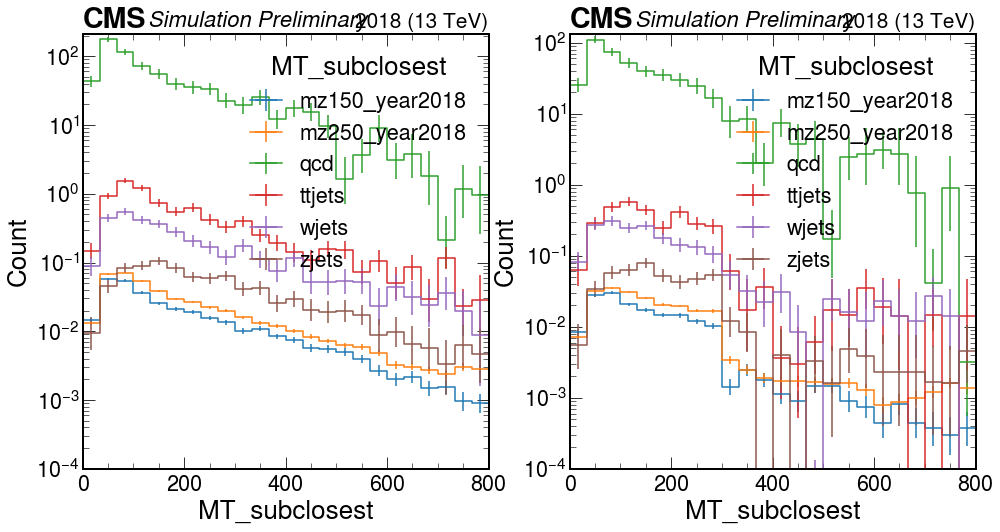

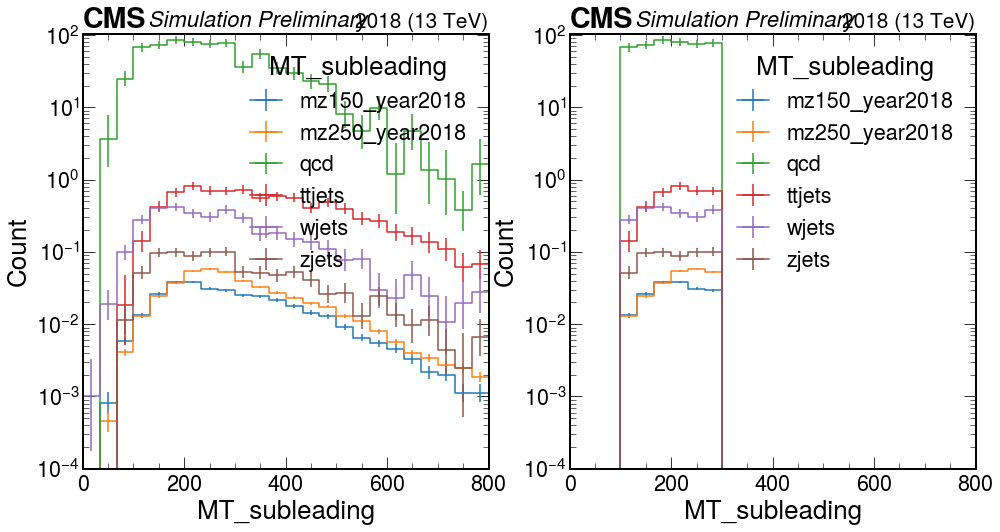

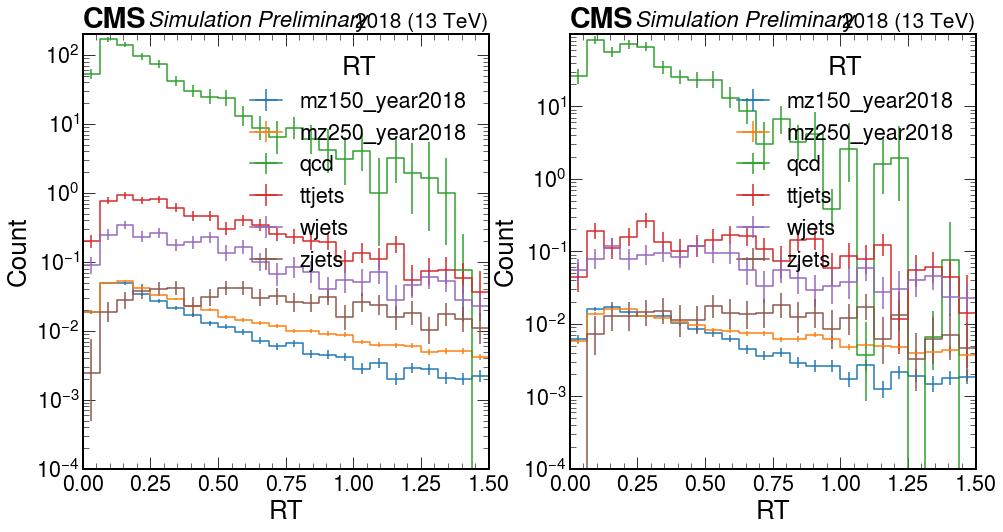

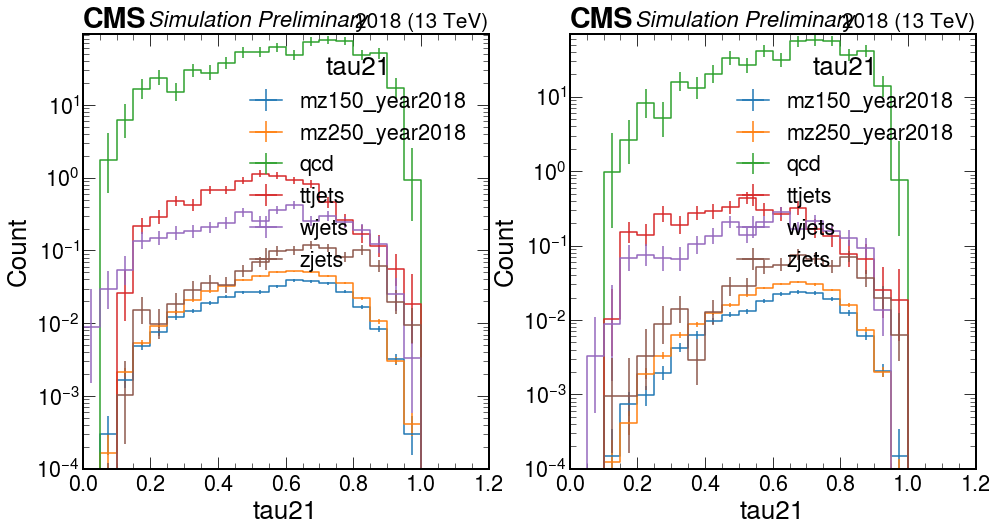

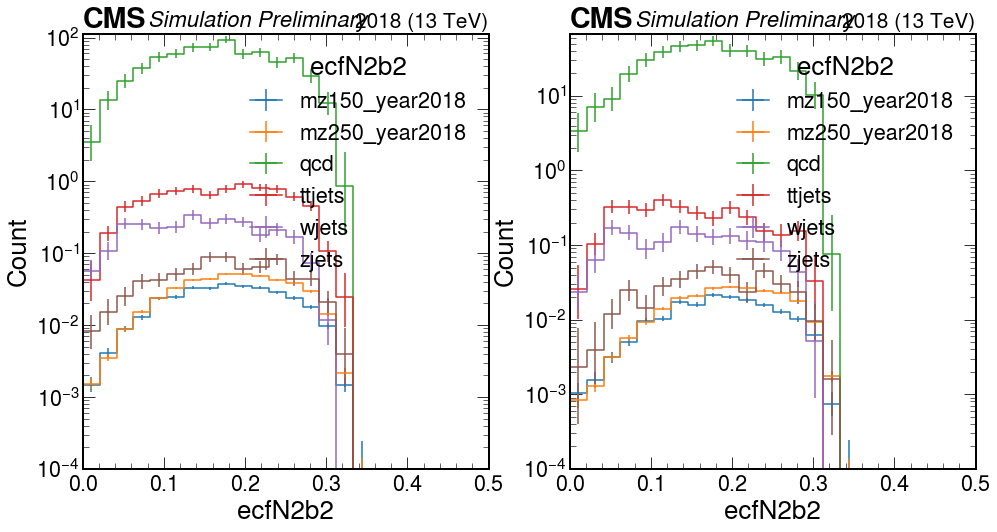

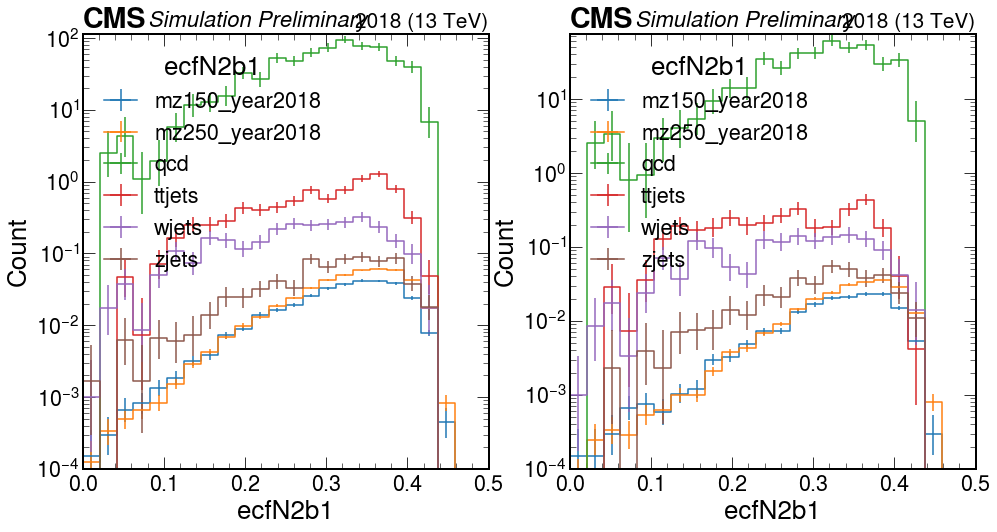

In [117]:
plot_var_also_window(
    signals + bkgs,
    lambda arrays: np.array(arrays[b'JetsAK15_subclosest_MT'].flatten()),
    varname = 'MT_subclosest', right=800.,
    )

plot_var_also_window(
    signals + bkgs,
    lambda arrays: np.array(arrays[b'JetsAK15_subleading_MT'].flatten()),
    varname = 'MT_subleading', right=800.,
    )

plot_var_also_window(
    signals + bkgs,
    lambda arrays: np.array(arrays[b'JetsAK15_subleading_RT'].flatten()),
    varname = 'RT', right=1.5,
    )

plot_var_also_window(
    signals + bkgs,
    lambda arrays: np.array(arrays[b'JetsAK15_subleading_NsubjettinessTau2'].flatten()) / np.array(arrays[b'JetsAK15_subleading_NsubjettinessTau1'].flatten()),
    varname = 'tau21', right=1.2,
    )

plot_var_also_window(
    signals + bkgs,
    lambda arrays: np.array(arrays[b'JetsAK15_subleading_ecfN2b2'].flatten()),
    varname = 'ecfN2b2', right=.5,
    )

plot_var_also_window(
    signals + bkgs,
    lambda arrays: np.array(arrays[b'JetsAK15_subleading_ecfN2b1'].flatten()),
    varname = 'ecfN2b1', right=.5,
    )

### Post trigger roc curves

/Users/klijnsma/miniconda3/envs/condaroot/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
   INFO:2020-11-03 18:10:01:__init__:7 Logger datasets is already defined
   INFO:2020-11-03 18:10:01:__init__:31 Using tqdm notebook


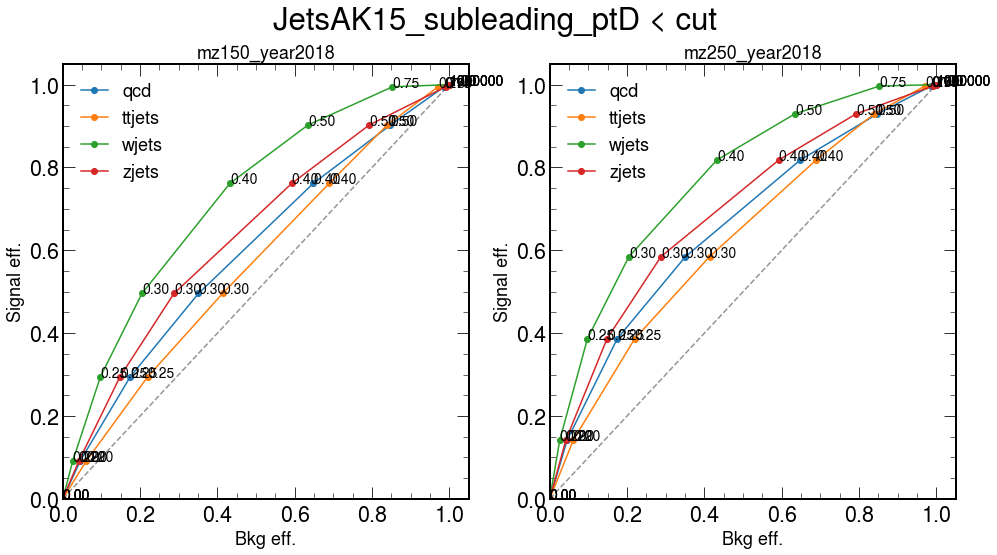

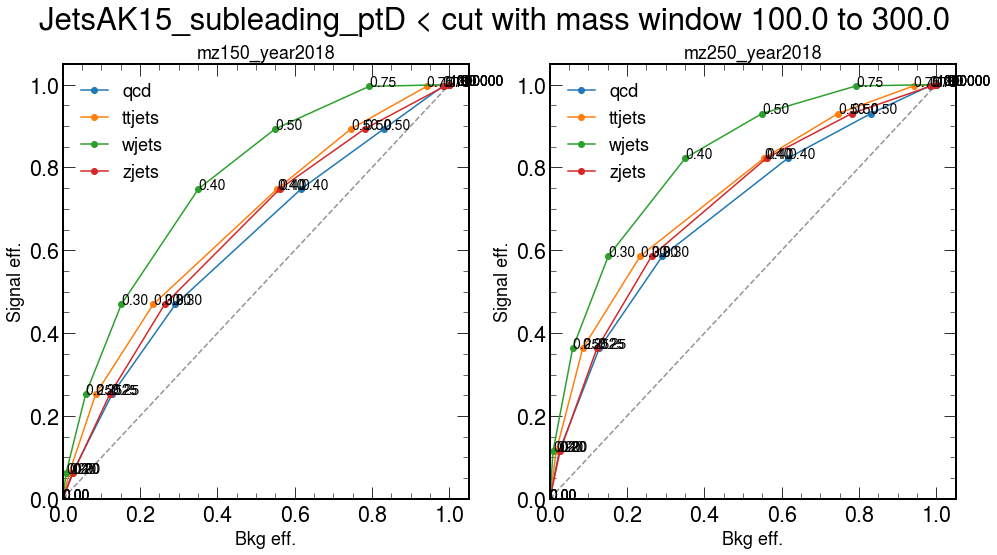

In [158]:
importlib.reload(svjflatanalysis)
importlib.reload(svjflatanalysis.arrayutils)
importlib.reload(svjflatanalysis.roccurve)

for cutfn, cutvals in [
#     (
#         svjflatanalysis.roccurve.mt_cut_function,
#         [ 0.0, 30., 70., 150., 200., 300., 400., 500., 1e7 ]
#         ),
#     (
#         svjflatanalysis.roccurve.met_cut_function,
#         svjflatanalysis.roccurve.met_cut_values
#         ),
#     (
#         svjflatanalysis.roccurve.rt_cut_function,
#         svjflatanalysis.roccurve.rt_cut_values
#         ),
#     (
#         svjflatanalysis.roccurve.dphimet_cut_function,
#         svjflatanalysis.roccurve.dphimet_cut_values,
#         ),
#     (
#         svjflatanalysis.roccurve.deltaeta_cut_function,
#         svjflatanalysis.roccurve.deltaeta_cut_values,
#         ),
#     (
#         svjflatanalysis.roccurve.subleading_axismajor_cut_function,
#         [0.0, 0.005, 0.01, 0.05, 0.1, 0.2, 0.4, 0.5, 1e6]
#         ),
#     (
#         svjflatanalysis.roccurve.subleading_axisminor_cut_function,
#         [0.0, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1, 0.5, 1e6]
#         ),
#     (
#         svjflatanalysis.roccurve.subleading_ecfN2b1_cut_function,
#         [0.0, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 1e6]
#         ),
#     (
#         svjflatanalysis.roccurve.subleading_ecfN2b2_cut_function,
#         [0.0, 0.05, 0.1, 0.15, 0.2, 0.22, 0.25, 0.3, 1e6]
#         ),
#     (
#         svjflatanalysis.roccurve.subleading_ecfN3b1_cut_function,
#         [0.0, 1.0, 1.25, 1.375, 1.5, 1.75, 2.0, 2.5, 1e6]
#         ),
#     (
#         svjflatanalysis.roccurve.subleading_ecfN3b2_cut_function,
#         [0.0, 1.0, 1.25, 1.375, 1.5, 1.75, 2.0, 2.5, 1e6]
#         ),
#     (
#         svjflatanalysis.roccurve.subleading_girth_cut_function,
#         [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 1e6]
#         ),
    (
        svjflatanalysis.roccurve.subleading_ptD_cut_function,
        [0.0, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1.0, 1e6]
        ),
    ]:
    
    fig, _ = svjflatanalysis.roccurve.plot_multiple_signals_per_bkg(
        signals, bkgs,
        cutfn, cutvals
        )
    if hasattr(cutfn, 'name'):
        varname = cutfn.name
    else:
        varname = cutfn.__name__.replace('_cut_function', '')
    fig.suptitle(varname)
    
    window_cutfn = svjflatanalysis.roccurve.apply_window_cutfn(cutfn, 100., 300.)

    fig, _ = svjflatanalysis.roccurve.plot_multiple_signals_per_bkg(
        signals, bkgs,
        window_cutfn, cutvals
        )
    fig.suptitle(varname + ' with mass window {} to {}'.format(window_cutfn.left, window_cutfn.right))


In [35]:
svjflatanalysis.roccurve.apply_mass_window(svjflatanalysis.roccurve.rt_cut_function, 100., 300.).name

AttributeError: 'function' object has no attribute 'name'

In [43]:
importlib.reload(svjflatanalysis.roccurve)
svjflatanalysis.roccurve.apply_window_cutfn(svjflatanalysis.roccurve.msd_cut_function, 100., 300.)

<function svjflatanalysis.roccurve.apply_window_cutfn.<locals>.cutfn_with_mass_window(arrays, cut)>